In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [58]:
from ISpy.assess import magnitude
from obspy.core import read

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
st=read('data/20190823222210/SAC/CU.PNR01.20190823222210.HHE.sac')

In [28]:
a=1e-6
r=4
mag=magnitude.ml_luc(a,r)
print(mag)

1.064624992


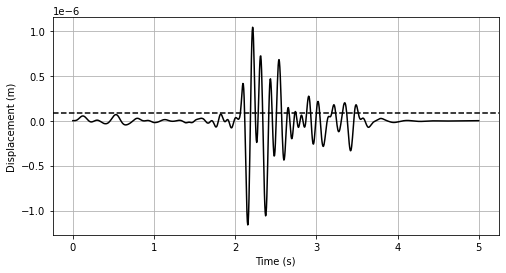

In [63]:
mag=0
r=4

amp=magnitude.ml_luc_amp(mag,r)

plt.figure(figsize=[8,4])
plt.plot(st[0].times(),st[0].data,'k')
plt.axhline(y=amp,c='k',ls='--')
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.show()

In [81]:
radius=10
sampling=0.1
array_size=int((radius*2)/sampling)
print(array_size)
ev_epiloc=int(radius/0.1)

depth=2
mag=1

array=np.empty((array_size,array_size),dtype=float)
print(array.shape[0])

for i in range(array.shape[0]):
    for j in range(array.shape[1]):
        hypo=np.sqrt((i*sampling-radius)**2+(j*sampling-radius)**2+depth**2)
        amp=magnitude.ml_luc_amp(mag,hypo)
        array[i,j]=amp
        

200
200


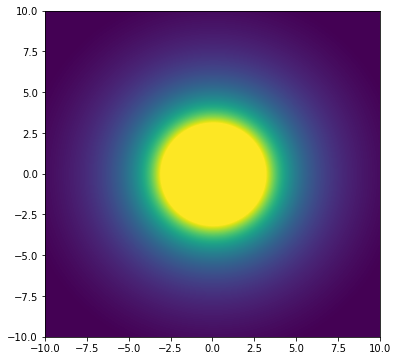

In [82]:
fig = plt.figure(figsize=[6,6])
img1 = plt.imshow(array, interpolation='bilinear',extent=[-radius,radius,-radius,radius],aspect='auto')
img1.set_clim(1e-7,1e-6)
plt.show()